In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import linregress

# importing trap data
# spring
trap_SP_all = pd.read_csv('scatter_plots_SSC_traps/SP_trap_scatterplot_data_all.csv')
trap_SP_closed = pd.read_csv('scatter_plots_SSC_traps/SP_trap_scatterplot_data_closed.csv')
trap_SP_open = pd.read_csv('scatter_plots_SSC_traps/SP_trap_scatterplot_data_open.csv')
# summer
trap_SM_all = pd.read_csv('scatter_plots_SSC_traps/SM_trap_scatterplot_data_all.csv')
trap_SM_closed = pd.read_csv('scatter_plots_SSC_traps/SM_trap_scatterplot_data_closed.csv')
trap_SM_open = pd.read_csv('scatter_plots_SSC_traps/SM_trap_scatterplot_data_open.csv')

# importing SSC data
# spring
SSC_SP_all = pd.read_csv('scatter_plots_SSC_traps/SP_SSC_scatterplot_data.csv')
# summer
SSC_SM_all = pd.read_csv('scatter_plots_SSC_traps/SM_SSC_scatterplot_data.csv')

Change classification name

In [3]:
replace_dict = {
    'CS': 'Coarse Sand',
    'FS': 'Fine Sand',
    'S': 'Silt',
    'C': 'Clay'
}

dfs = [
    trap_SP_all, trap_SP_closed, trap_SP_open,
    trap_SM_all, trap_SM_closed, trap_SM_open,
    SSC_SM_all, SSC_SP_all]

for df in dfs:
    df['Class'] = df['Class'].replace(replace_dict)

### Merge Dataframes for plotting

In [4]:
# merge trap and SSC data by season with custom suffixes
summer_all = trap_SM_all.merge(SSC_SM_all, on='Size', how='left', suffixes=('_trap', '_SSC'))
summer_open = trap_SM_open.merge(SSC_SM_all, on='Size', how='left', suffixes=('_trap', '_SSC'))
summer_closed = trap_SM_closed.merge(SSC_SM_all, on='Size', how='left', suffixes=('_trap', '_SSC'))

spring_all = trap_SP_all.merge(SSC_SP_all, on='Size', how='left', suffixes=('_trap', '_SSC'))
spring_open = trap_SP_open.merge(SSC_SP_all, on='Size', how='left', suffixes=('_trap', '_SSC'))
spring_closed = trap_SP_closed.merge(SSC_SP_all, on='Size', how='left', suffixes=('_trap', '_SSC'))


### Single Scatterplots

#### D50

All

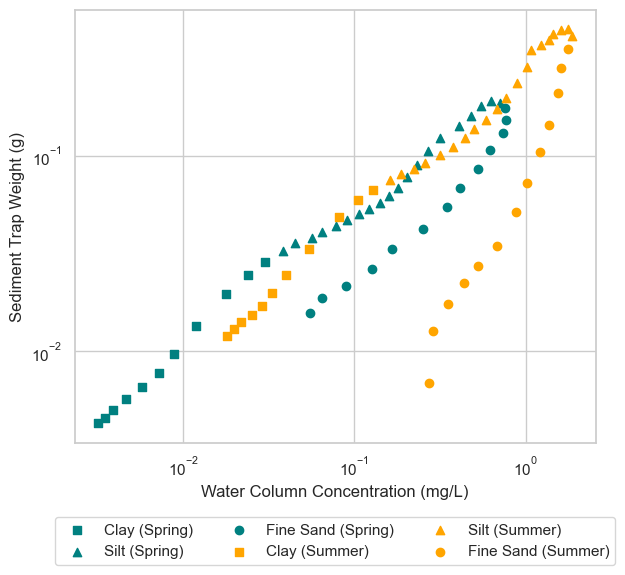

In [48]:
# marker and colors
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
season_colors = {'Spring': 'teal', 'Summer': 'orange'}

plt.figure(figsize=(6.5, 6))

# spring data
for idx, row in spring_all.iterrows():
    size_class = row['Class_trap']
    x = row['D50_SSC']
    y = row['D50_trap']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Spring'],
            label=f'{size_class} (Spring)')

# summer data
for idx, row in summer_all.iterrows():
    size_class = row['Class_trap']
    x = row['D50_SSC']
    y = row['D50_trap']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Summer'], 
                label=f'{size_class} (Summer)')

# log scale
plt.xscale('log')
plt.yscale('log')

# axis labels 
#plt.grid(False)
plt.xlabel('Water Column Concentration (mg/L)')
plt.ylabel('Sediment Trap Weight (g)')
#plt.title('All Traps vs. Water Concentration by Grain Size and Season')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),
            loc='lower center',
            bbox_to_anchor=(0.5, -0.3),
            ncol=3)

plt.tight_layout()
plt.show()


Open

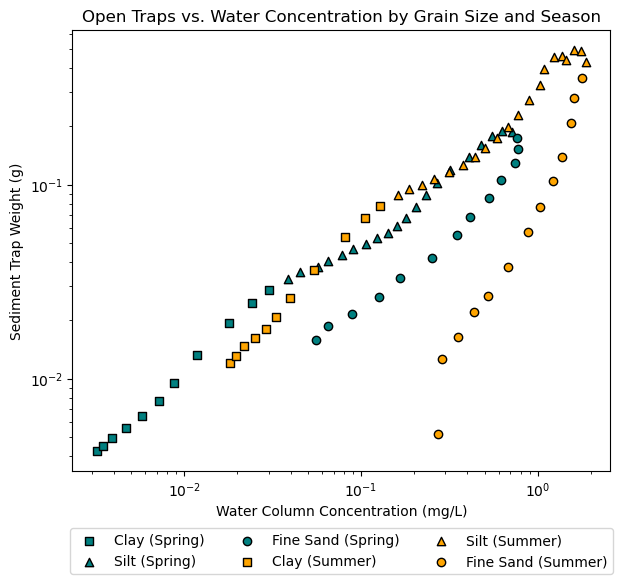

In [12]:
# marker and colors
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
season_colors = {'Spring': 'teal', 'Summer': 'orange'}

plt.figure(figsize=(6.5, 6))

# spring data
for idx, row in spring_open.iterrows():
    size_class = row['Class_trap']
    x = row['D50_SSC']
    y = row['D50_trap']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Spring'],
                edgecolor='black',label=f'{size_class} (Spring)')

# summer data
for idx, row in summer_open.iterrows():
    size_class = row['Class_trap']
    x = row['D50_SSC']
    y = row['D50_trap']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Summer'], 
                edgecolor='black',label=f'{size_class} (Summer)')

# log scale
plt.xscale('log')
plt.yscale('log')

# axis labels 
plt.xlabel('Water Column Concentration (mg/L)')
plt.ylabel('Sediment Trap Weight (g)')
plt.title('Open Traps vs. Water Concentration by Grain Size and Season')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),
            loc='lower center',
            bbox_to_anchor=(0.5, -0.25),
            ncol=3)

plt.tight_layout()
plt.show()

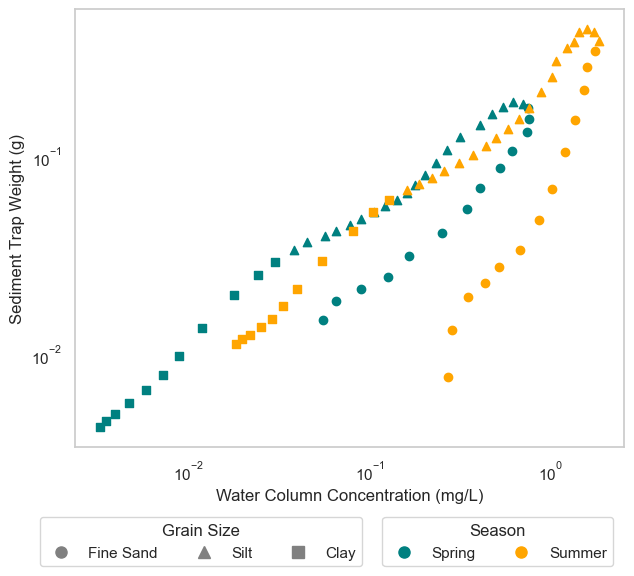

In [49]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# marker and colors
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
season_colors = {'Spring': 'teal', 'Summer': 'orange'}
sns.set(style="whitegrid")

plt.figure(figsize=(6.5, 6))

# plot data
for idx, row in spring_closed.iterrows():
    size_class = row['Class_trap']
    x = row['D50_SSC']
    y = row['D50_trap']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Spring'])

for idx, row in summer_closed.iterrows():
    size_class = row['Class_trap']
    x = row['D50_SSC']
    y = row['D50_trap']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Summer'])

# log scale
plt.xscale('log')
plt.yscale('log')

# axis labels 
plt.grid(False)
plt.xlabel('Water Column Concentration (mg/L)')
plt.ylabel('Sediment Trap Weight (g)')
#plt.title('Closed Traps vs. Water Concentration by Grain Size and Season')

# custom legend for grain size (gray markers)
grain_handles = [Line2D([0], [0], marker=markers[cls], color='gray', linestyle='',
                        markersize=8, label=cls) for cls in markers]

# custom legend for seasons (colored circles)
season_handles = [Line2D([0], [0], marker='o', color=color, linestyle='',
                         markersize=8, label=season, markerfacecolor=color) 
                  for season, color in season_colors.items()]

# add legends
legend1 = plt.legend(handles=grain_handles, title='Grain Size', loc='lower center',
                     bbox_to_anchor=(0.23, -0.29), ncol=3)
legend2 = plt.legend(handles=season_handles, title='Season', loc='lower center',
                     bbox_to_anchor=(0.77, -0.29), ncol=2)

plt.gca().add_artist(legend1)  # add the first legend manually

plt.tight_layout()
plt.show()


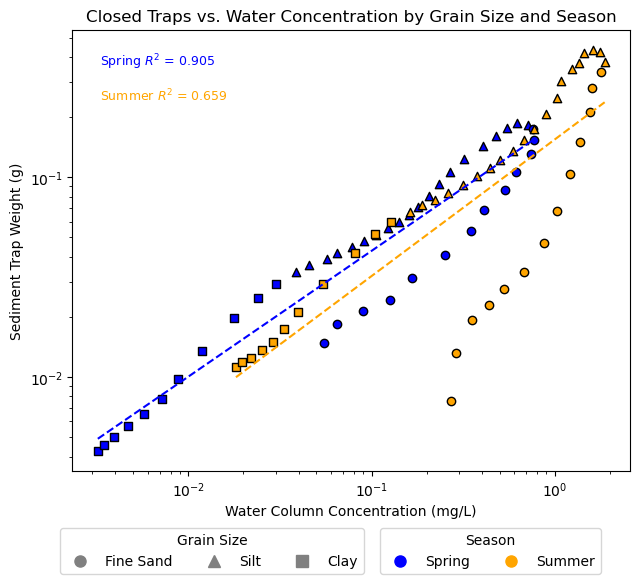

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import linregress

# marker and colors
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
season_colors = {'Spring': 'blue', 'Summer': 'orange'}

plt.figure(figsize=(6.5, 6))

# store seasonal data for regression
season_data = {'Spring': [], 'Summer': []}

# plot data and collect for regression
for idx, row in spring_closed.iterrows():
    size_class = row['Class_trap']
    x = row['D50_SSC']
    y = row['D50_trap']
    season_data['Spring'].append((x, y))
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Spring'],
                edgecolor='black')

for idx, row in summer_closed.iterrows():
    size_class = row['Class_trap']
    x = row['D50_SSC']
    y = row['D50_trap']
    season_data['Summer'].append((x, y))
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Summer'],
                edgecolor='black')

# log scale
plt.xscale('log')
plt.yscale('log')

# axis labels 
plt.xlabel('Water Column Concentration (mg/L)')
plt.ylabel('Sediment Trap Weight (g)')
plt.title('Closed Traps vs. Water Concentration by Grain Size and Season')

# overall season regression (log-log)
for season, points in season_data.items():
    if len(points) >= 2:
        x_vals = np.array([pt[0] for pt in points])
        y_vals = np.array([pt[1] for pt in points])
        
        # Remove non-positive values (log10 invalid)
        mask = (x_vals > 0) & (y_vals > 0)
        x_log = np.log10(x_vals[mask])
        y_log = np.log10(y_vals[mask])
        
        slope, intercept, r_value, p_value, std_err = linregress(x_log, y_log)
        r2 = r_value ** 2

        # regression line in log space
        x_range = np.logspace(np.log10(x_vals[mask].min()), np.log10(x_vals[mask].max()), 100)
        y_fit = 10 ** (slope * np.log10(x_range) + intercept)
        plt.plot(x_range, y_fit, linestyle='--', color=season_colors[season], label=f'{season} Fit')

        # annotate R^2
        y_text = 0.95 if season == 'Spring' else 0.87
        plt.text(0.05, y_text, f'{season} $R^2$ = {r2:.3f}',
                 transform=plt.gca().transAxes,
                 fontsize=9, color=season_colors[season],
                 verticalalignment='top')

# custom legends
# grain size legend (gray)
grain_handles = [Line2D([0], [0], marker=markers[cls], color='gray', linestyle='',
                        markersize=8, label=cls) for cls in markers]

# season color legend
season_handles = [Line2D([0], [0], marker='o', color=color, linestyle='',
                         markersize=8, label=season, markerfacecolor=color) 
                  for season, color in season_colors.items()]

# add legends
legend1 = plt.legend(handles=grain_handles, title='Grain Size', loc='lower center',
                     bbox_to_anchor=(0.25, -0.25), ncol=3)
legend2 = plt.legend(handles=season_handles, title='Season', loc='lower center',
                     bbox_to_anchor=(0.75, -0.25), ncol=2)
plt.gca().add_artist(legend1)

plt.tight_layout()
plt.show()


Closed

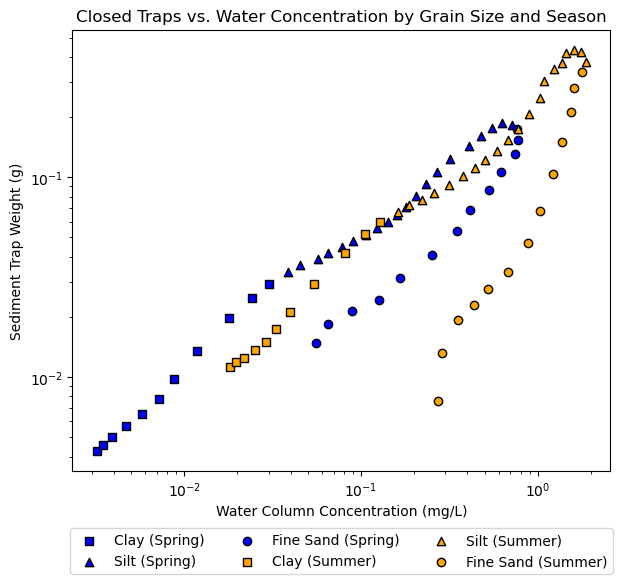

In [15]:
# marker and colors
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
season_colors = {'Spring': 'blue', 'Summer': 'orange'}

plt.figure(figsize=(6.5, 6))

# spring data
for idx, row in spring_closed.iterrows():
    size_class = row['Class_trap']
    x = row['D50_SSC']
    y = row['D50_trap']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Spring'],
                edgecolor='black',label=f'{size_class} (Spring)')

# summer data
for idx, row in summer_closed.iterrows():
    size_class = row['Class_trap']
    x = row['D50_SSC']
    y = row['D50_trap']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Summer'], 
                edgecolor='black',label=f'{size_class} (Summer)')

# log scale
plt.xscale('log')
plt.yscale('log')

# axis labels 
plt.xlabel('Water Column Concentration (mg/L)')
plt.ylabel('Sediment Trap Weight (g)')
plt.title('Closed Traps vs. Water Concentration by Grain Size and Season')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),
            loc='lower center',
            bbox_to_anchor=(0.5, -0.25),
            ncol=3)

plt.tight_layout()
plt.show()

#### Average

##### Summer

All

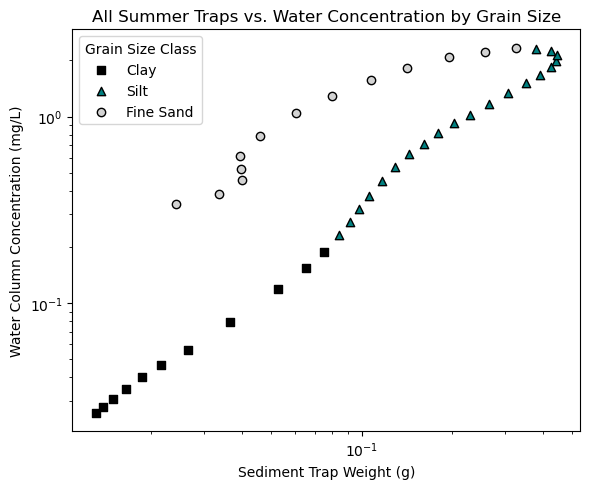

In [16]:
# marker and color maps
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
colors = {'Fine Sand': 'lightgray', 'Silt': 'teal', 'Clay': 'black'}

plt.figure(figsize=(6, 5))

# loop through the dataframe rows
for idx, row in summer_all.iterrows():
    size_class = row['Class_trap']  
    x = row['Avg_trap']
    y = row['Avg_SSC']
    
    plt.scatter(x, y,
                marker=markers[size_class],
                color=colors[size_class],
                edgecolor='black', 
                label=size_class)

# log scales 
plt.xscale('log')
plt.yscale('log')

# axis labels
plt.xlabel('Sediment Trap Weight (g)')
plt.ylabel('Water Column Concentration (mg/L)')
plt.title('All Summer Traps vs. Water Concentration by Grain Size')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Grain Size Class")

plt.tight_layout()
plt.show()


Open

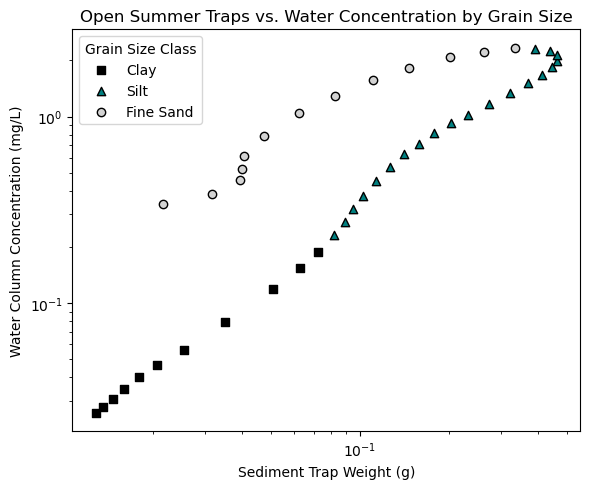

In [17]:
# marker and color maps
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
colors = {'Fine Sand': 'lightgray', 'Silt': 'teal', 'Clay': 'black'}

plt.figure(figsize=(6, 5))

# loop through the dataframe rows
for idx, row in summer_open.iterrows():
    size_class = row['Class_trap']  
    x = row['Avg_trap']
    y = row['Avg_SSC']
    
    plt.scatter(x, y,
                marker=markers[size_class],
                color=colors[size_class],
                edgecolor='black',  
                label=size_class)

# log scales 
plt.xscale('log')
plt.yscale('log')

# axis labels
plt.xlabel('Sediment Trap Weight (g)')
plt.ylabel('Water Column Concentration (mg/L)')
plt.title('Open Summer Traps vs. Water Concentration by Grain Size')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Grain Size Class")

plt.tight_layout()
plt.show()

Closed

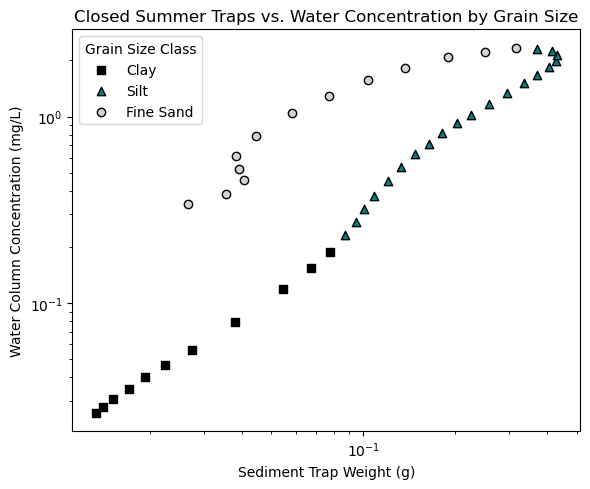

In [18]:
# marker and color maps
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
colors = {'Fine Sand': 'lightgray', 'Silt': 'teal', 'Clay': 'black'}

plt.figure(figsize=(6, 5))

# loop through the dataframe rows
for idx, row in summer_closed.iterrows():
    size_class = row['Class_trap']  
    x = row['Avg_trap']
    y = row['Avg_SSC']
    
    plt.scatter(x, y,
                marker=markers[size_class],
                color=colors[size_class],
                edgecolor='black',  
                label=size_class)

# log scales 
plt.xscale('log')
plt.yscale('log')

# axis labels
plt.xlabel('Sediment Trap Weight (g)')
plt.ylabel('Water Column Concentration (mg/L)')
plt.title('Closed Summer Traps vs. Water Concentration by Grain Size')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Grain Size Class")

plt.tight_layout()
plt.show()

##### Spring

All

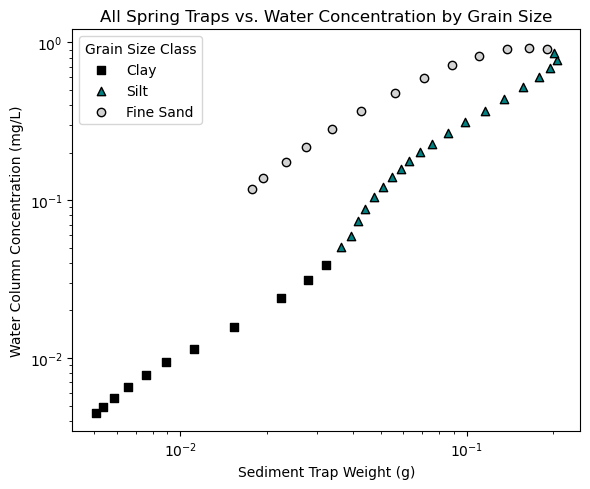

In [19]:
# marker and color maps
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
colors = {'Fine Sand': 'lightgray', 'Silt': 'teal', 'Clay': 'black'}

plt.figure(figsize=(6, 5))

# loop through the dataframe rows
for idx, row in spring_all.iterrows():
    size_class = row['Class_trap']  
    x = row['Avg_trap']
    y = row['Avg_SSC']
    
    plt.scatter(x, y,
                marker=markers[size_class],
                color=colors[size_class],
                edgecolor='black', 
                label=size_class)

# log scales 
plt.xscale('log')
plt.yscale('log')

# axis labels
plt.xlabel('Sediment Trap Weight (g)')
plt.ylabel('Water Column Concentration (mg/L)')
plt.title('All Spring Traps vs. Water Concentration by Grain Size')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Grain Size Class")

plt.tight_layout()
plt.show()

Open

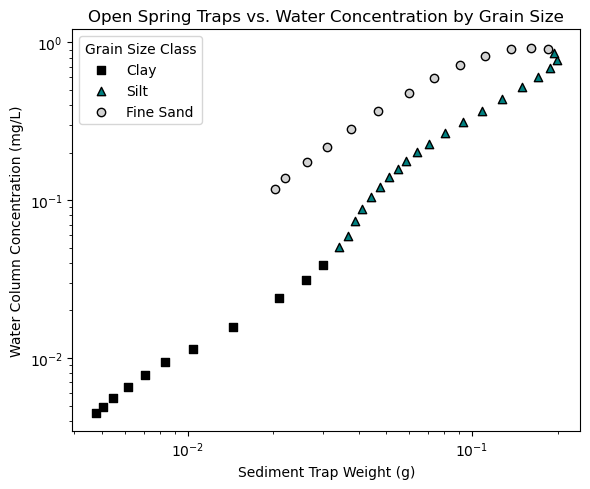

In [20]:
# marker and color maps
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
colors = {'Fine Sand': 'lightgray', 'Silt': 'teal', 'Clay': 'black'}

plt.figure(figsize=(6, 5))

# loop through the dataframe rows
for idx, row in spring_open.iterrows():
    size_class = row['Class_trap']  
    x = row['Avg_trap']
    y = row['Avg_SSC']
    
    plt.scatter(x, y,
                marker=markers[size_class],
                color=colors[size_class],
                edgecolor='black',  
                label=size_class)

# log scales 
plt.xscale('log')
plt.yscale('log')

# axis labels
plt.xlabel('Sediment Trap Weight (g)')
plt.ylabel('Water Column Concentration (mg/L)')
plt.title('Open Spring Traps vs. Water Concentration by Grain Size')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Grain Size Class")

plt.tight_layout()
plt.show()

Closed

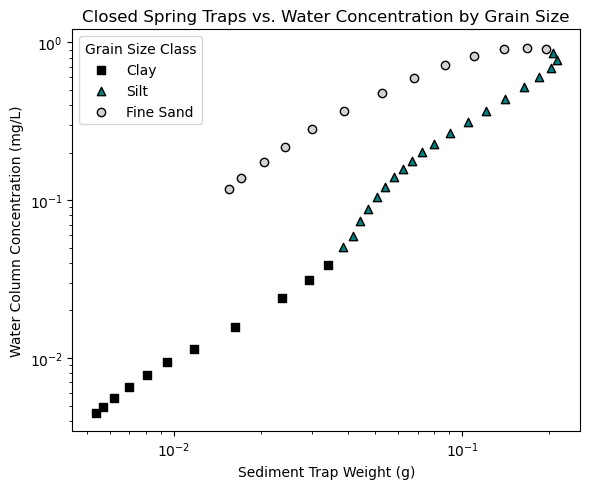

In [21]:
# marker and color maps
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
colors = {'Fine Sand': 'lightgray', 'Silt': 'teal', 'Clay': 'black'}

plt.figure(figsize=(6, 5))

# loop through the dataframe rows
for idx, row in spring_closed.iterrows():
    size_class = row['Class_trap']  
    x = row['Avg_trap']
    y = row['Avg_SSC']
    
    plt.scatter(x, y,
                marker=markers[size_class],
                color=colors[size_class],
                edgecolor='black',  
                label=size_class)

# log scales 
plt.xscale('log')
plt.yscale('log')

# axis labels
plt.xlabel('Sediment Trap Weight (g)')
plt.ylabel('Water Column Concentration (mg/L)')
plt.title('Closed Spring Traps vs. Water Concentration by Grain Size')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Grain Size Class")

plt.tight_layout()
plt.show()

##### Both Seasons

All

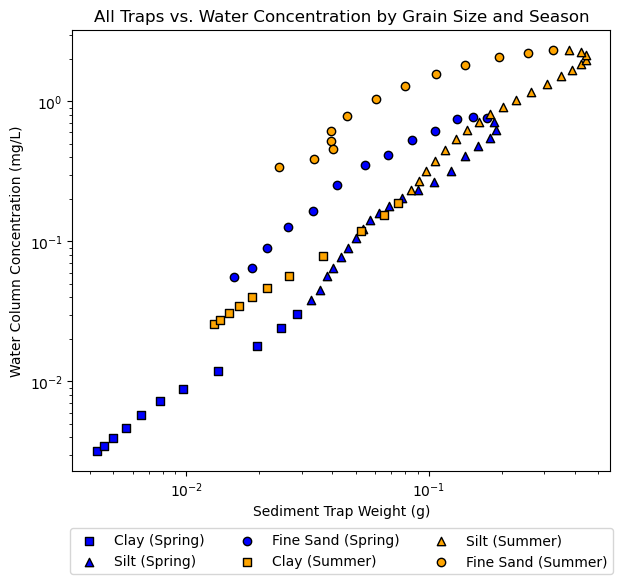

In [22]:
# marker and colors
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
season_colors = {'Spring': 'blue', 'Summer': 'orange'}

plt.figure(figsize=(6.5, 6))

# spring data
for idx, row in spring_all.iterrows():
    size_class = row['Class_trap']
    x = row['D50_trap']
    y = row['D50_SSC']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Spring'],
                edgecolor='black',label=f'{size_class} (Spring)')

# summer data
for idx, row in summer_all.iterrows():
    size_class = row['Class_trap']
    x = row['Avg_trap']
    y = row['Avg_SSC']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Summer'], 
                edgecolor='black',label=f'{size_class} (Summer)')

# log scale
plt.xscale('log')
plt.yscale('log')

# axis labels 
plt.xlabel('Sediment Trap Weight (g)')
plt.ylabel('Water Column Concentration (mg/L)')
plt.title('All Traps vs. Water Concentration by Grain Size and Season')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),
            loc='lower center',
            bbox_to_anchor=(0.5, -0.25),
            ncol=3)

plt.tight_layout()
plt.show()

Open

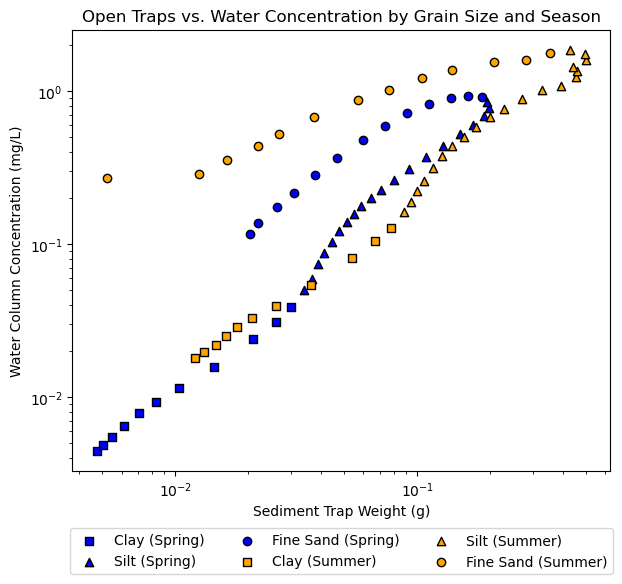

In [23]:
# marker and colors
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
season_colors = {'Spring': 'blue', 'Summer': 'orange'}

plt.figure(figsize=(6.5, 6))

# spring data
for idx, row in spring_open.iterrows():
    size_class = row['Class_trap']
    x = row['Avg_trap']
    y = row['Avg_SSC']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Spring'],
                edgecolor='black',label=f'{size_class} (Spring)')

# summer data
for idx, row in summer_open.iterrows():
    size_class = row['Class_trap']
    x = row['D50_trap']
    y = row['D50_SSC']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Summer'], 
                edgecolor='black',label=f'{size_class} (Summer)')

# log scale
plt.xscale('log')
plt.yscale('log')

# axis labels 
plt.xlabel('Sediment Trap Weight (g)')
plt.ylabel('Water Column Concentration (mg/L)')
plt.title('Open Traps vs. Water Concentration by Grain Size and Season')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),
            loc='lower center',
            bbox_to_anchor=(0.5, -0.25),
            ncol=3)

plt.tight_layout()
plt.show()

Closed


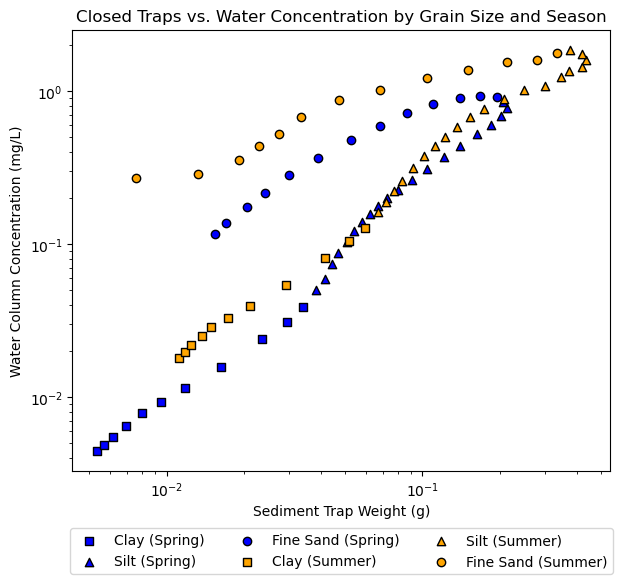

In [24]:
# marker and colors
markers = {'Fine Sand': 'o', 'Silt': '^', 'Clay': 's'}
season_colors = {'Spring': 'blue', 'Summer': 'orange'}

plt.figure(figsize=(6.5, 6))

# spring data
for idx, row in spring_closed.iterrows():
    size_class = row['Class_trap']
    x = row['Avg_trap']
    y = row['Avg_SSC']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Spring'],
                edgecolor='black',label=f'{size_class} (Spring)')

# summer data
for idx, row in summer_closed.iterrows():
    size_class = row['Class_trap']
    x = row['D50_trap']
    y = row['D50_SSC']
    
    plt.scatter(x, y, marker=markers[size_class], color=season_colors['Summer'], 
                edgecolor='black',label=f'{size_class} (Summer)')

# log scale
plt.xscale('log')
plt.yscale('log')

# axis labels 
plt.xlabel('Sediment Trap Weight (g)')
plt.ylabel('Water Column Concentration (mg/L)')
plt.title('Closed Traps vs. Water Concentration by Grain Size and Season')

# legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),
            loc='lower center',
            bbox_to_anchor=(0.5, -0.25),
            ncol=3)

plt.tight_layout()
plt.show()

### Subplots by GSD

#### Median

All

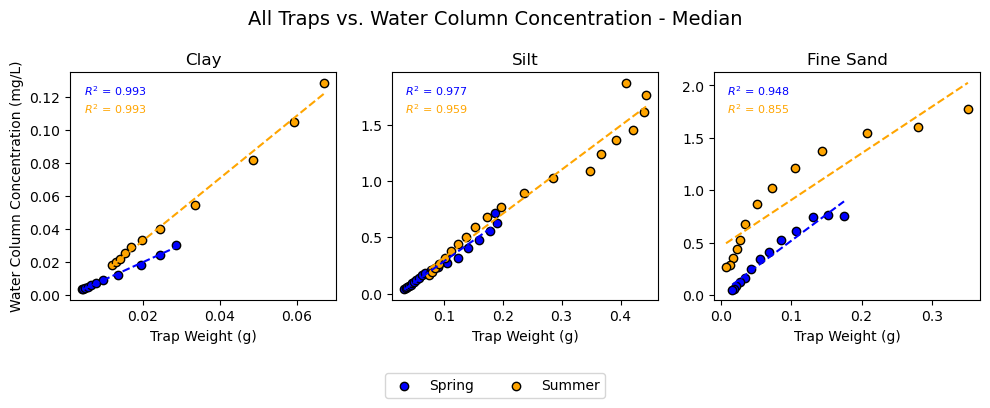

Linear Regression Fits:

Grain Size: Clay
  Spring: 1.057x + -0.001, R² = 0.993
  Summer: 1.895x + -0.005, R² = 0.993

Grain Size: Silt
  Spring: 3.710x + -0.086, R² = 0.977
  Summer: 3.907x + -0.073, R² = 0.959

Grain Size: Fine Sand
  Spring: 4.993x + 0.023, R² = 0.948
  Summer: 4.439x + 0.466, R² = 0.855



In [25]:
grain_sizes = ['Clay', 'Silt', 'Fine Sand']
season_colors = {'Spring': 'blue', 'Summer': 'orange'}

fig, axes = plt.subplots(1, 3, figsize=(10, 3.5), sharey=False)

for i, grain in enumerate(grain_sizes):
    ax = axes[i]
    
    for season, data, color in [('Spring', spring_all, 'blue'), ('Summer', summer_all, 'orange')]:
        subset = data[data['Class_trap'] == grain]
        x = subset['D50_trap']
        y = subset['D50_SSC']
        ax.scatter(x, y, color=color, edgecolor='black', marker='o', label=season if i == 0 else None)
        
        # fit regression line in log-log space
        if len(x) >= 2:  # need at least two points to fit
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            r2 = r_value**2

            # create line
            x_vals = np.linspace(x.min(), x.max(), 100)
            y_vals = (slope * (x_vals) + intercept)
            ax.plot(x_vals, y_vals, color=color, linestyle='--')

            # annotate R²
            ax.text(0.05, 0.95 if season == 'Spring' else 0.87,
                    f'$R^2$ = {r2:.3f}',
                    transform=ax.transAxes,
                    fontsize=8,
                    color=color,
                    verticalalignment='top')

    # axes
    ax.set_xlabel('Trap Weight (g)')
    if i == 0:
        ax.set_ylabel('Water Column Concentration (mg/L)')
    ax.set_title(grain)

# legend (only once)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.suptitle('All Traps vs. Water Column Concentration - Median', fontsize=14)
plt.subplots_adjust(top=0.8, bottom=0.15)
plt.show()

# print regression equation
grain_sizes = ['Clay', 'Silt', 'Fine Sand']
seasons = {'Spring': spring_all, 'Summer': summer_all}

print("Linear Regression Fits:\n")

for grain in grain_sizes:
    print(f"Grain Size: {grain}")
    for season_name, df in seasons.items():
        subset = df[df['Class_trap'] == grain]
        x = subset['D50_trap']
        y = subset['D50_SSC']
        
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        r2 = r_value**2
        print(f"  {season_name}: {slope:.3f}x + {intercept:.3f}, R² = {r2:.3f}")
    print() 

Open

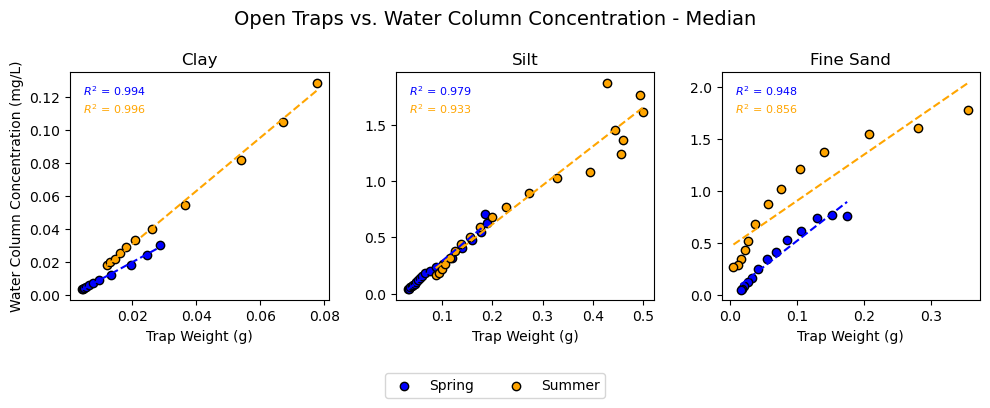

Linear Regression Fits:

Grain Size: Clay
  Spring: 1.057x + -0.001, R² = 0.994
  Summer: 1.614x + -0.002, R² = 0.996

Grain Size: Silt
  Spring: 3.726x + -0.085, R² = 0.979
  Summer: 3.465x + -0.079, R² = 0.933

Grain Size: Fine Sand
  Spring: 4.993x + 0.022, R² = 0.948
  Summer: 4.421x + 0.464, R² = 0.856



In [26]:
grain_sizes = ['Clay', 'Silt', 'Fine Sand']
season_colors = {'Spring': 'blue', 'Summer': 'orange'}

fig, axes = plt.subplots(1, 3, figsize=(10, 3.5), sharey=False)

for i, grain in enumerate(grain_sizes):
    ax = axes[i]
    
    for season, data, color in [('Spring', spring_open, 'blue'), ('Summer', summer_open, 'orange')]:
        subset = data[data['Class_trap'] == grain]
        x = subset['D50_trap']
        y = subset['D50_SSC']
        ax.scatter(x, y, color=color, edgecolor='black', marker='o', label=season if i == 0 else None)
        
        # fit regression line in log-log space
        if len(x) >= 2:  # need at least two points to fit
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            r2 = r_value**2

            # create line
            x_vals = np.linspace(x.min(), x.max(), 100)
            y_vals = (slope * (x_vals) + intercept)
            ax.plot(x_vals, y_vals, color=color, linestyle='--')

            # annotate R²
            ax.text(0.05, 0.95 if season == 'Spring' else 0.87,
                    f'$R^2$ = {r2:.3f}',
                    transform=ax.transAxes,
                    fontsize=8,
                    color=color,
                    verticalalignment='top')

    # axes
    ax.set_xlabel('Trap Weight (g)')
    if i == 0:
        ax.set_ylabel('Water Column Concentration (mg/L)')
    ax.set_title(grain)

# legend (only once)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.suptitle('Open Traps vs. Water Column Concentration - Median', fontsize=14)
plt.subplots_adjust(top=0.8, bottom=0.15)
plt.show()

# print regression equation
grain_sizes = ['Clay', 'Silt', 'Fine Sand']
seasons = {'Spring': spring_open, 'Summer': summer_open}

print("Linear Regression Fits:\n")

for grain in grain_sizes:
    print(f"Grain Size: {grain}")
    for season_name, df in seasons.items():
        subset = df[df['Class_trap'] == grain]
        x = subset['D50_trap']
        y = subset['D50_SSC']
        
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        r2 = r_value**2
        print(f"  {season_name}: {slope:.3f}x + {intercept:.3f}, R² = {r2:.3f}")
    print() 


Closed

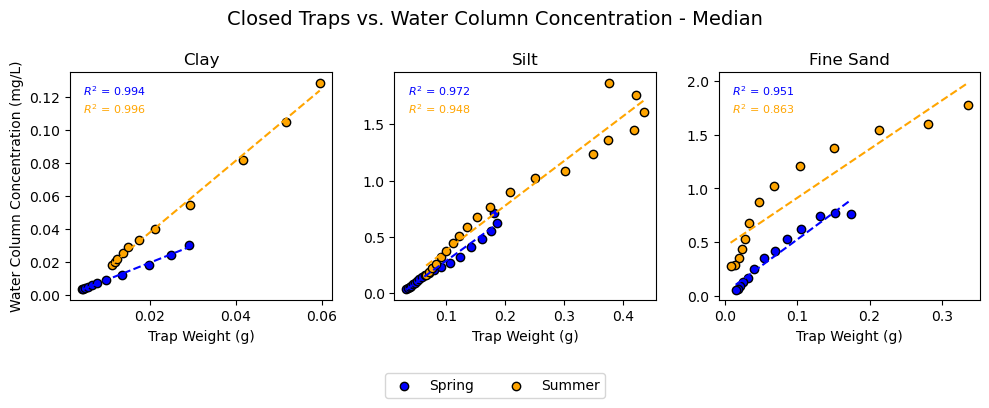

Linear Regression Fits:

Grain Size: Clay
  Spring: 1.036x + -0.001, R² = 0.994
  Summer: 2.178x + -0.006, R² = 0.996

Grain Size: Silt
  Spring: 3.802x + -0.097, R² = 0.972
  Summer: 3.995x + -0.024, R² = 0.948

Grain Size: Fine Sand
  Spring: 4.969x + 0.027, R² = 0.951
  Summer: 4.546x + 0.458, R² = 0.863



In [27]:
grain_sizes = ['Clay', 'Silt', 'Fine Sand']
season_colors = {'Spring': 'blue', 'Summer': 'orange'}

fig, axes = plt.subplots(1, 3, figsize=(10, 3.5), sharey=False)

for i, grain in enumerate(grain_sizes):
    ax = axes[i]
    
    for season, data, color in [('Spring', spring_closed, 'blue'), ('Summer', summer_closed, 'orange')]:
        subset = data[data['Class_trap'] == grain]
        x = subset['D50_trap']
        y = subset['D50_SSC']
        ax.scatter(x, y, color=color, edgecolor='black', marker='o', label=season if i == 0 else None)
        
        # fit regression line in log-log space
        if len(x) >= 2:  # need at least two points to fit
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            r2 = r_value**2

            # create line
            x_vals = np.linspace(x.min(), x.max(), 100)
            y_vals = (slope * (x_vals) + intercept)
            ax.plot(x_vals, y_vals, color=color, linestyle='--')

            # annotate R²
            ax.text(0.05, 0.95 if season == 'Spring' else 0.87,
                    f'$R^2$ = {r2:.3f}',
                    transform=ax.transAxes,
                    fontsize=8,
                    color=color,
                    verticalalignment='top')

    # axes
    ax.set_xlabel('Trap Weight (g)')
    if i == 0:
        ax.set_ylabel('Water Column Concentration (mg/L)')
    ax.set_title(grain)

# legend (only once)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.suptitle('Closed Traps vs. Water Column Concentration - Median', fontsize=14)
plt.subplots_adjust(top=0.8, bottom=0.15)
plt.show()

# print regression equation
grain_sizes = ['Clay', 'Silt', 'Fine Sand']
seasons = {'Spring': spring_closed, 'Summer': summer_closed}

print("Linear Regression Fits:\n")

for grain in grain_sizes:
    print(f"Grain Size: {grain}")
    for season_name, df in seasons.items():
        subset = df[df['Class_trap'] == grain]
        x = subset['D50_trap']
        y = subset['D50_SSC']
        
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        r2 = r_value**2
        print(f"  {season_name}: {slope:.3f}x + {intercept:.3f}, R² = {r2:.3f}")
    print() 

#### Average

All

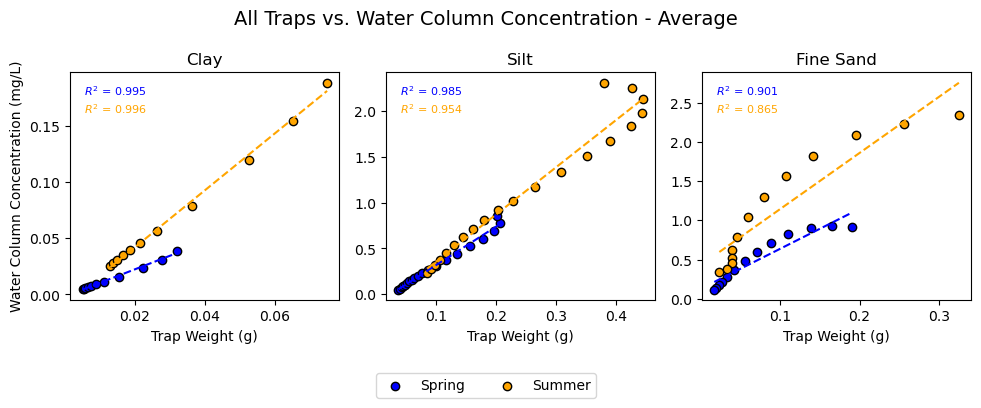

Linear Regression Fits:

Grain Size: Clay
  Spring: 1.208x + -0.002, R² = 0.995
  Summer: 2.537x + -0.009, R² = 0.996

Grain Size: Silt
  Spring: 4.190x + -0.098, R² = 0.985
  Summer: 5.142x + -0.155, R² = 0.954

Grain Size: Fine Sand
  Spring: 5.123x + 0.124, R² = 0.901
  Summer: 7.186x + 0.424, R² = 0.865



In [28]:
grain_sizes = ['Clay', 'Silt', 'Fine Sand']
season_colors = {'Spring': 'blue', 'Summer': 'orange'}

fig, axes = plt.subplots(1, 3, figsize=(10, 3.5), sharey=False)

for i, grain in enumerate(grain_sizes):
    ax = axes[i]
    
    for season, data, color in [('Spring', spring_all, 'blue'), ('Summer', summer_all, 'orange')]:
        subset = data[data['Class_trap'] == grain]
        x = subset['Avg_trap']
        y = subset['Avg_SSC']
        ax.scatter(x, y, color=color, edgecolor='black', marker='o', label=season if i == 0 else None)
        
        # fit regression line in log-log space
        if len(x) >= 2:  # need at least two points to fit
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            r2 = r_value**2

            # create line
            x_vals = np.linspace(x.min(), x.max(), 100)
            y_vals = (slope * (x_vals) + intercept)
            ax.plot(x_vals, y_vals, color=color, linestyle='--')

            # annotate R²
            ax.text(0.05, 0.95 if season == 'Spring' else 0.87,
                    f'$R^2$ = {r2:.3f}',
                    transform=ax.transAxes,
                    fontsize=8,
                    color=color,
                    verticalalignment='top')

    # axes
    ax.set_xlabel('Trap Weight (g)')
    if i == 0:
        ax.set_ylabel('Water Column Concentration (mg/L)')
    ax.set_title(grain)

# legend (only once)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.suptitle('All Traps vs. Water Column Concentration - Average', fontsize=14)
plt.subplots_adjust(top=0.8, bottom=0.15)
plt.show()

# print regression equation
grain_sizes = ['Clay', 'Silt', 'Fine Sand']
seasons = {'Spring': spring_all, 'Summer': summer_all}

print("Linear Regression Fits:\n")

for grain in grain_sizes:
    print(f"Grain Size: {grain}")
    for season_name, df in seasons.items():
        subset = df[df['Class_trap'] == grain]
        x = subset['Avg_trap']
        y = subset['Avg_SSC']
        
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        r2 = r_value**2
        print(f"  {season_name}: {slope:.3f}x + {intercept:.3f}, R² = {r2:.3f}")
    print() 

Open

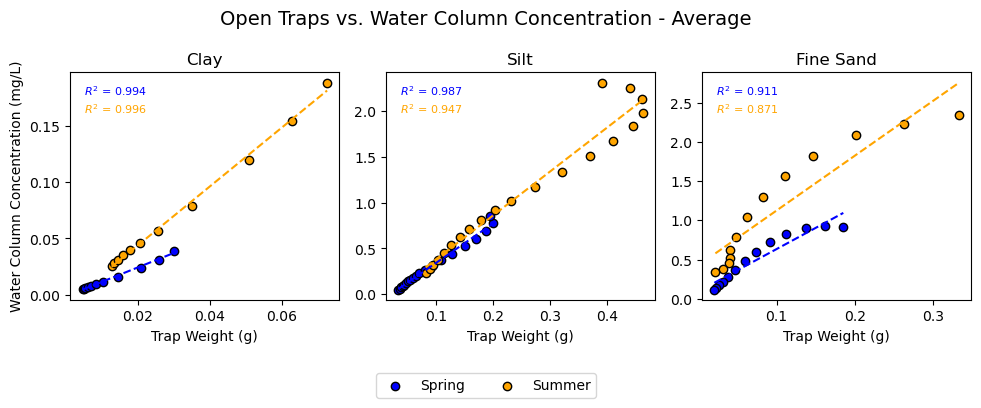

Linear Regression Fits:

Grain Size: Clay
  Spring: 1.292x + -0.002, R² = 0.994
  Summer: 2.635x + -0.009, R² = 0.996

Grain Size: Silt
  Spring: 4.314x + -0.089, R² = 0.987
  Summer: 4.810x + -0.100, R² = 0.947

Grain Size: Fine Sand
  Spring: 5.405x + 0.095, R² = 0.911
  Summer: 6.992x + 0.428, R² = 0.871



In [29]:
grain_sizes = ['Clay', 'Silt', 'Fine Sand']
season_colors = {'Spring': 'blue', 'Summer': 'orange'}

fig, axes = plt.subplots(1, 3, figsize=(10, 3.5), sharey=False)

for i, grain in enumerate(grain_sizes):
    ax = axes[i]
    
    for season, data, color in [('Spring', spring_open, 'blue'), ('Summer', summer_open, 'orange')]:
        subset = data[data['Class_trap'] == grain]
        x = subset['Avg_trap']
        y = subset['Avg_SSC']
        ax.scatter(x, y, color=color, edgecolor='black', marker='o', label=season if i == 0 else None)
        
        # fit regression line in log-log space
        if len(x) >= 2:  # need at least two points to fit
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            r2 = r_value**2

            # create line
            x_vals = np.linspace(x.min(), x.max(), 100)
            y_vals = (slope * (x_vals) + intercept)
            ax.plot(x_vals, y_vals, color=color, linestyle='--')

            # annotate R²
            ax.text(0.05, 0.95 if season == 'Spring' else 0.87,
                    f'$R^2$ = {r2:.3f}',
                    transform=ax.transAxes,
                    fontsize=8,
                    color=color,
                    verticalalignment='top')

    # axes
    ax.set_xlabel('Trap Weight (g)')
    if i == 0:
        ax.set_ylabel('Water Column Concentration (mg/L)')
    ax.set_title(grain)

# legend (only once)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.suptitle('Open Traps vs. Water Column Concentration - Average', fontsize=14)
plt.subplots_adjust(top=0.8, bottom=0.15)
plt.show()

# print regression equation
grain_sizes = ['Clay', 'Silt', 'Fine Sand']
seasons = {'Spring': spring_open, 'Summer': summer_open}

print("Linear Regression Fits:\n")

for grain in grain_sizes:
    print(f"Grain Size: {grain}")
    for season_name, df in seasons.items():
        subset = df[df['Class_trap'] == grain]
        x = subset['Avg_trap']
        y = subset['Avg_SSC']
        
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        r2 = r_value**2
        print(f"  {season_name}: {slope:.3f}x + {intercept:.3f}, R² = {r2:.3f}")
    print() 


Closed

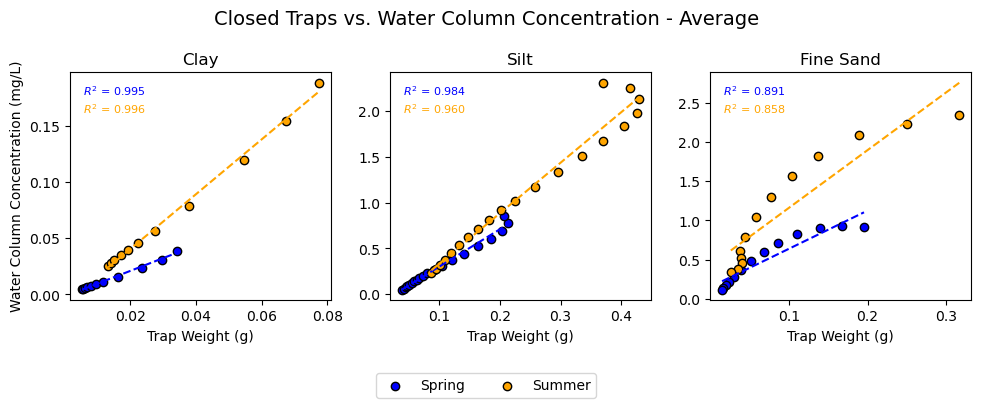

Linear Regression Fits:

Grain Size: Clay
  Spring: 1.139x + -0.002, R² = 0.995
  Summer: 2.446x + -0.008, R² = 0.996

Grain Size: Silt
  Spring: 4.083x + -0.106, R² = 0.984
  Summer: 5.519x + -0.218, R² = 0.960

Grain Size: Fine Sand
  Spring: 4.887x + 0.149, R² = 0.891
  Summer: 7.389x + 0.420, R² = 0.858



In [30]:
grain_sizes = ['Clay', 'Silt', 'Fine Sand']
season_colors = {'Spring': 'blue', 'Summer': 'orange'}

fig, axes = plt.subplots(1, 3, figsize=(10, 3.5), sharey=False)

for i, grain in enumerate(grain_sizes):
    ax = axes[i]
    
    for season, data, color in [('Spring', spring_closed, 'blue'), ('Summer', summer_closed, 'orange')]:
        subset = data[data['Class_trap'] == grain]
        x = subset['Avg_trap']
        y = subset['Avg_SSC']
        ax.scatter(x, y, color=color, edgecolor='black', marker='o', label=season if i == 0 else None)
        
        # fit regression line in log-log space
        if len(x) >= 2:  # need at least two points to fit
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            r2 = r_value**2

            # create line
            x_vals = np.linspace(x.min(), x.max(), 100)
            y_vals = (slope * (x_vals) + intercept)
            ax.plot(x_vals, y_vals, color=color, linestyle='--')

            # annotate R²
            ax.text(0.05, 0.95 if season == 'Spring' else 0.87,
                    f'$R^2$ = {r2:.3f}',
                    transform=ax.transAxes,
                    fontsize=8,
                    color=color,
                    verticalalignment='top')

    # axes
    ax.set_xlabel('Trap Weight (g)')
    if i == 0:
        ax.set_ylabel('Water Column Concentration (mg/L)')
    ax.set_title(grain)

# legend (only once)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.suptitle('Closed Traps vs. Water Column Concentration - Average', fontsize=14)
plt.subplots_adjust(top=0.8, bottom=0.15)
plt.show()

# print regression equation
grain_sizes = ['Clay', 'Silt', 'Fine Sand']
seasons = {'Spring': spring_closed, 'Summer': summer_closed}

print("Linear Regression Fits:\n")

for grain in grain_sizes:
    print(f"Grain Size: {grain}")
    for season_name, df in seasons.items():
        subset = df[df['Class_trap'] == grain]
        x = subset['Avg_trap']
        y = subset['Avg_SSC']
        
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        r2 = r_value**2
        print(f"  {season_name}: {slope:.3f}x + {intercept:.3f}, R² = {r2:.3f}")
    print() 